In [1]:
import pandas as pd
from os import listdir
import glob
from glob import iglob
import seaborn as sns

path = r'D:/Databases/moodle_test/*.csv'

df = pd.concat((pd.read_csv(f) for f in iglob(path, recursive=True)), ignore_index=True)

df.head()

df.columns

Index(['Hora', 'Nombre completo del usuario', 'Usuario afectado',
       'Contexto del evento', 'Componente', 'Nombre evento', 'Descripción',
       'Origen', 'Dirección IP'],
      dtype='object')

In [2]:
df.shape
df.quantile(.5)
df.Componente.value_counts()
pd.crosstab(df.Componente,df.Origen)

Origen,web,ws
Componente,,
Actividad del curso,2,0
Archivos enviados,58,8
Carpeta,213,57
Chat,97,11
Comentarios de la entrega,5,0
Cuestionario,359,63
Foro,2762,571
Glosario,560,134
Informe del calificador,2,0


In [40]:
# extraer fecha

df['datefull'] = pd.to_datetime(df['Hora'])

# Date
df['date']= df['datefull'].dt.date
df['year']= df['datefull'].dt.year
df['month']= df['datefull'].dt.month
df['day']= df['datefull'].dt.day

# Time
df['hour']= df['datefull'].dt.hour

df.columns

Index(['Hora', 'Nombre completo del usuario', 'Usuario afectado',
       'Contexto del evento', 'Componente', 'Nombre evento', 'Descripción',
       'Origen', 'Dirección IP', 'datefull', 'date', 'year', 'month', 'day',
       'hour'],
      dtype='object')

In [10]:
df_contexto = df['Contexto del evento'].value_counts()
cadena = "Curso:"
df.loc[df['Contexto del evento'].str.contains(r'^' + cadena)]

,Hora,Nombre completo del usuario,Usuario afectado,Contexto del evento,Componente,Nombre evento,Descripción,Origen,Dirección IP
0,29/05/2021 23:56,Prof. Raidell Avello Martínez,-,Curso: Tecnología Educativa,Registros,Informe de registros visto,The user with id '1059' viewed the log report ...,web,172.25.0.1
1,29/05/2021 23:55,Prof. Raidell Avello Martínez,-,Curso: Tecnología Educativa,Sistema,Curso visto,The user with id '1059' viewed the course with...,web,172.25.0.1
3,29/05/2021 23:43,Daymi Martinez Rodriguez,-,Curso: Tecnología Educativa,Sistema,Curso visto,The user with id '1895' viewed the course with...,web,172.25.0.1
15,29/05/2021 23:40,Daymi Martinez Rodriguez,-,Curso: Tecnología Educativa,Sistema,Curso visto,The user with id '1895' viewed the course with...,web,172.25.0.1
20,29/05/2021 23:31,Marileydis Almaguel García,-,Curso: Tecnología Educativa,Sistema,Curso visto,The user with id '1878' viewed the course with...,web,172.25.0.1
...,...,...,...,...,...,...,...,...,...
10425,20/04/2021 12:13,Javier Lázaro Castellón Dorta,-,Curso: Tecnología Educativa,Sistema,Sección del curso creada,The user with id '2' created section number '3...,web,172.25.0.1
10426,20/04/2021 12:13,Javier Lázaro Castellón Dorta,-,Curso: Tecnología Educativa,Sistema,Sección del curso creada,The user with id '2' created section number '2...,web,172.25.0.1
10427,20/04/2021 12:13,Javier Lázaro Castellón Dorta,-,Curso: Tecnología Educativa,Sistema,Sección del curso creada,The user with id '2' created section number '1...,web,172.25.0.1
10428,20/04/2021 12:13,Javier Lázaro Castellón Dorta,-,Curso: Tecnología Educativa,Sistema,Sección del curso creada,The user with id '2' created section number '0...,web,172.25.0.1


In [15]:
a = list()
df

,Hora,Nombre completo del usuario,Usuario afectado,Contexto del evento,Componente,Nombre evento,Descripción,Origen,Dirección IP
0,29/05/2021 23:56,Prof. Raidell Avello Martínez,-,Curso: Tecnología Educativa,Registros,Informe de registros visto,The user with id '1059' viewed the log report ...,web,172.25.0.1
1,29/05/2021 23:55,Prof. Raidell Avello Martínez,-,Curso: Tecnología Educativa,Sistema,Curso visto,The user with id '1059' viewed the course with...,web,172.25.0.1
2,29/05/2021 23:53,Edward Medilahaxon Pina,-,Foro: Foro del Tema 2: El diseño instruccional...,Foro,Módulo de curso visto,The user with id '2529' viewed the 'forum' act...,web,172.25.0.1
3,29/05/2021 23:43,Daymi Martinez Rodriguez,-,Curso: Tecnología Educativa,Sistema,Curso visto,The user with id '1895' viewed the course with...,web,172.25.0.1
4,29/05/2021 23:42,Daymi Martinez Rodriguez,-,Tarea: Tarea 2,Tarea,Se ha visualizado el estado de la entrega.,The user with id '1895' has viewed the submiss...,web,172.25.0.1
...,...,...,...,...,...,...,...,...,...
10425,20/04/2021 12:13,Javier Lázaro Castellón Dorta,-,Curso: Tecnología Educativa,Sistema,Sección del curso creada,The user with id '2' created section number '3...,web,172.25.0.1
10426,20/04/2021 12:13,Javier Lázaro Castellón Dorta,-,Curso: Tecnología Educativa,Sistema,Sección del curso creada,The user with id '2' created section number '2...,web,172.25.0.1
10427,20/04/2021 12:13,Javier Lázaro Castellón Dorta,-,Curso: Tecnología Educativa,Sistema,Sección del curso creada,The user with id '2' created section number '1...,web,172.25.0.1
10428,20/04/2021 12:13,Javier Lázaro Castellón Dorta,-,Curso: Tecnología Educativa,Sistema,Sección del curso creada,The user with id '2' created section number '0...,web,172.25.0.1


<AxesSubplot:>

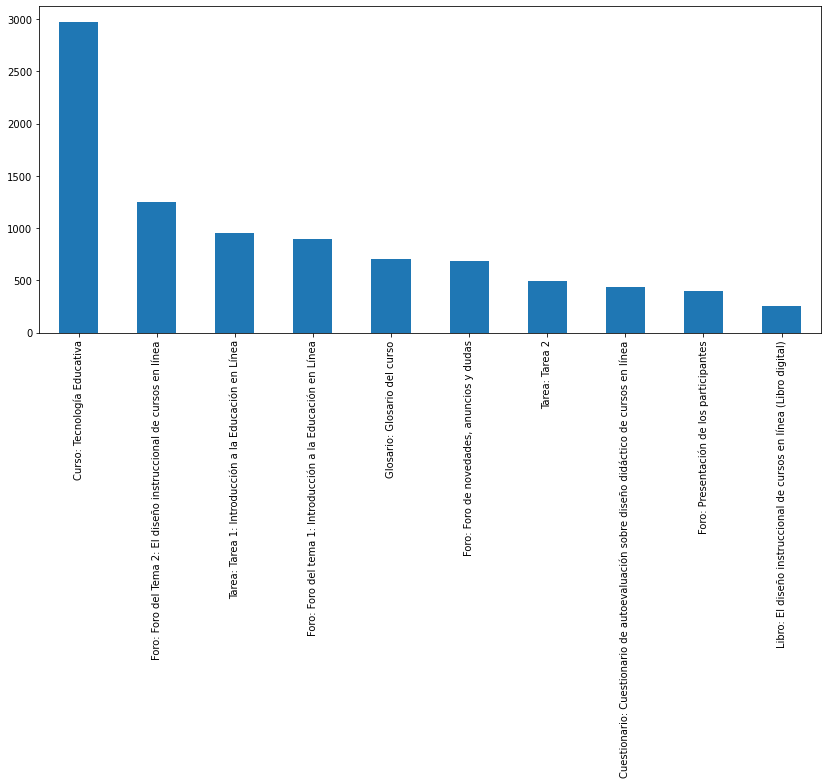

In [31]:
df_contexto.head(10).plot(kind='bar', figsize=(14,6))

In [30]:
#df_comp = df['Componente'].value_counts()
#print(df_comp)
cadena = df['Componente'].value_counts().index
print(cadena[1])
#df.loc[df['Contexto del evento'].str.contains(r'^' + cadena)]

Sistema


In [19]:
#df_usuario = df.groupby('Nombre completo del usuario')['Nombre completo del usuario'].count()

#df_usuario =  df.groupby('Nombre completo del usuario').count().reset_index().rename(columns={'Nombre completo del usuario': 'Count'})

df_usuario =  df[['date','Nombre completo del usuario']].value_counts().reset_index().rename(
           columns={'index': 'Date', 'Nombre completo del usuario': 'User', 0:'N'})
df_2 = df_usuario['date'].value_counts().reset_index().rename(
           columns={'index': 'Date', 'date':'N'}).sort_values('Date')
#df_2.plot(kind='line', figsize=(14,6), x = 'Date')
df_2

KeyError: "['date'] not in index"

In [36]:
df_usr_t1 = df.groupby('Nombre completo del usuario')['Nombre completo del usuario'].count()

df_usr_t1

Nombre completo del usuario
-                                     48
Adialys Acosta Rodriguez             408
Alexander Benavides Couto            381
Ana Beatriz Abreus Castro            574
Anaiyeli González Valladares         111
Arturo Joaquin Puron Olivera         470
Carlos Ricardo Gaimetea Castillo     971
Daimy Nualla Bolufé                  273
Daymi Martinez Rodriguez             307
Edward Medilahaxon Pina              218
Grey Alicia Crespo Lechuga           703
Ibys Espinosa Requesens                9
Imandra García Méndez                340
Jacqueline Zamora Galindo            432
Javier Lázaro Castellón Dorta        165
Laura Naranjo                         25
Lisandra Sánchez Peñalver            359
Liyanira Alonso                      266
Luis Alberto Herrera Martinez         80
Marileydis Almaguel García           575
Martha Abreu                         523
Midalys Llanes Cartaya               272
Norma Mur                             24
Prof. Raidell Avello Martínez

<AxesSubplot:xlabel='Nombre completo del usuario'>

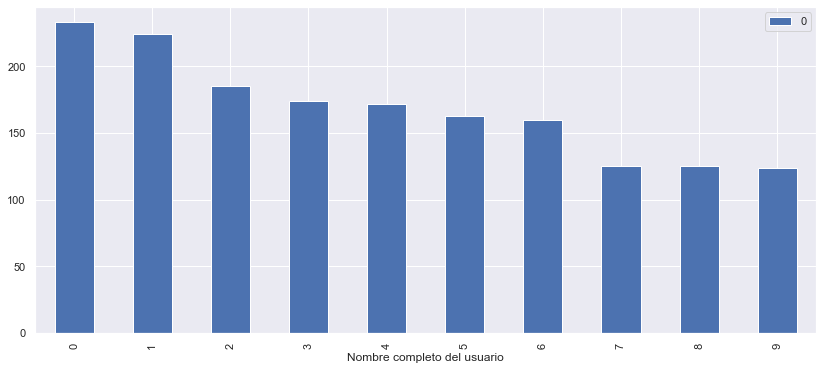

In [34]:
import seaborn as sns; sns.set(style='darkgrid')
df_usuario.head(10).plot(kind='bar', figsize=(14,6), xlabel='Nombre completo del usuario')

In [13]:

dd = df.groupby(df.Origen)
dd.count()


,Hora,Nombre completo del usuario,Usuario afectado,Contexto del evento,Componente,Nombre evento,Descripción,Dirección IP
Origen,,,,,,,,
web,9099,9099,9099,9099,9099,9099,9099,9099
ws,1331,1331,1331,1331,1331,1331,1331,1331


In [27]:
dd.mean()

,year,month,day,hour
Origen,,,,
web,2021.0,5.671063,17.767777,13.345423
ws,2021.0,5.760331,18.143501,17.317055
